# Chapter 9 In-chapter examples

In [1]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

# define global figure properties used for publication
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'savefig.dpi':300,          # output resolution
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 9.1: Sampling variability in random data

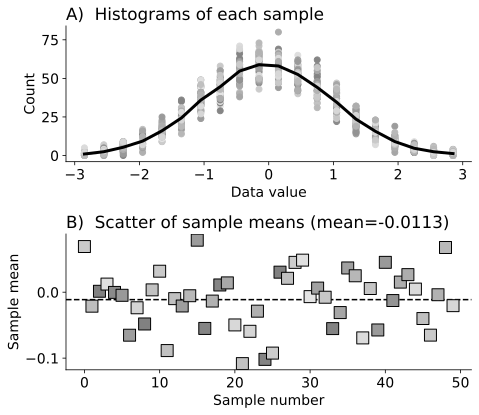

In [2]:
N = 500
nSamples = 50
kHistBins = 20

# bins for histograms
edges = np.linspace(-3,3,kHistBins+1)

# declare matrices
allHistY = np.zeros((nSamples,kHistBins))
allMeans = np.zeros(nSamples)


# setup figure
f,axs = plt.subplots(2,1,figsize=(7,6))

for sampi in range(nSamples):

  # create data (parameters don't chage!)
  data = np.random.normal(loc=0,scale=1,size=N)

  # histograms
  y,x = np.histogram(data,bins=edges)
  allHistY[sampi,:] = y

  # get means
  allMeans[sampi] = np.mean(data)

  # plot
  c = np.random.uniform(low=.5,high=.9)
  axs[0].plot((x[:-1]+x[1:])/2,y,'o',color=(c,c,c))

  axs[1].plot(sampi,np.mean(data),'ks',markersize=12,markerfacecolor=(c,c,c))


# plot the average histogram
axs[0].plot((x[:-1]+x[1:])/2,np.mean(allHistY,axis=0),'k',linewidth=3)

# plot the means, and the mean of the means
axs[1].axhline(np.mean(allMeans),linestyle='--',color='k',zorder=-1)

# make the plots look nicer
axs[0].set(xlabel='Data value',ylabel='Count')
axs[0].set_title(r'A)  Histograms of each sample')
axs[1].set(xlabel='Sample number',ylabel='Sample mean')
axs[1].set_title(r'B)  Scatter of sample means (mean=%.3g)' %np.mean(allMeans))

plt.tight_layout()
plt.show()